# Experimenting with HDBSCAN

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt

Create different datasets with particular properties

In [2]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

Plot them. The "real" clusters are colored.

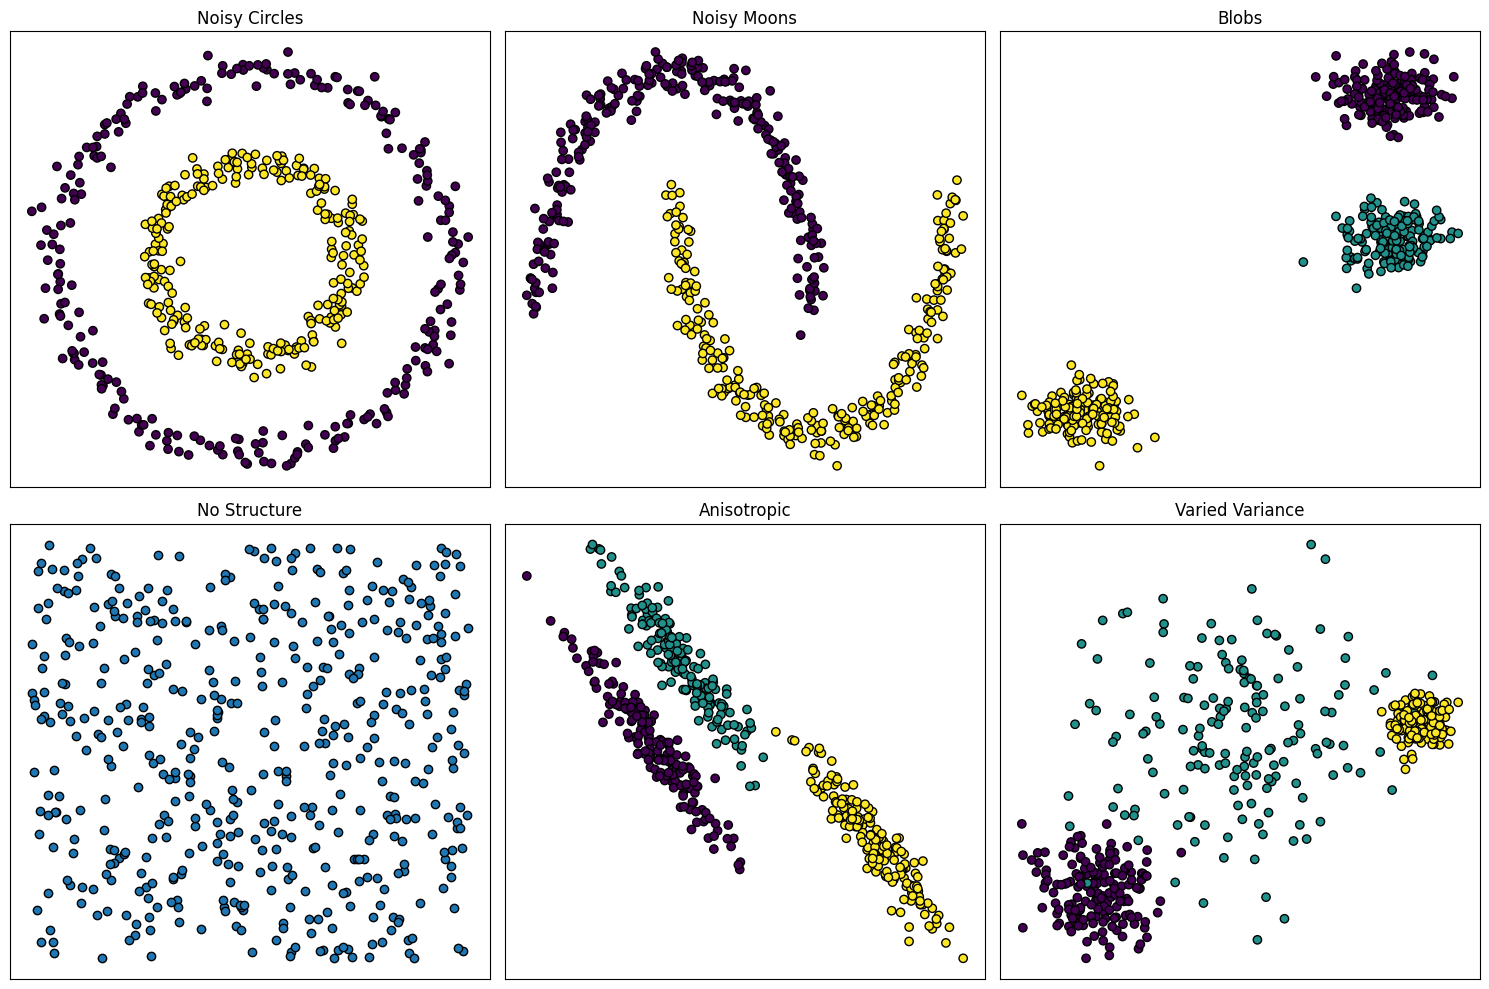

In [3]:
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
titles = ["Noisy Circles", "Noisy Moons", "Blobs", "No Structure", "Anisotropic", "Varied Variance"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (data, title) in enumerate(zip(datasets_list, titles)):
    X, y = data
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()
plt.show()

Use out-of-the box parameters and plot discovered clusters.

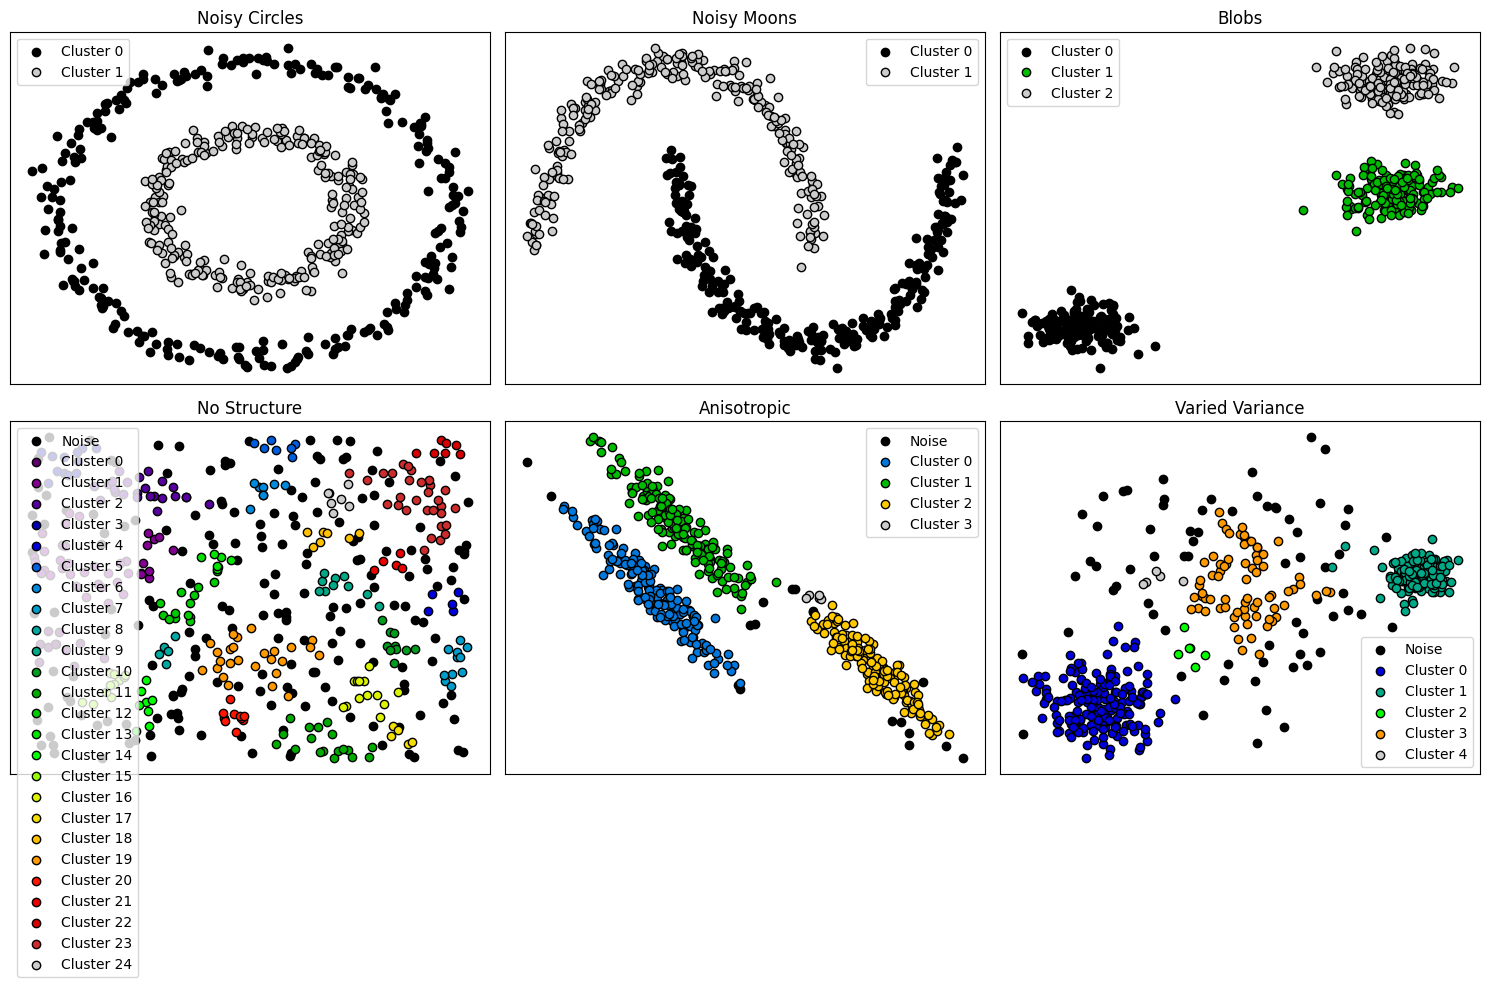

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (data, title) in enumerate(zip(datasets_list, titles)):
    X, y = data
    ax = axes[i]
    
    # Cluster using HDBSCAN
    clusterer = HDBSCAN()
    labels = clusterer.fit_predict(X)
    
    # Plot clusters and noise
    unique_labels = np.unique(labels)
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'  # Black color for noise points
            label="Noise"
        else:
            label=f'Cluster {k}'
        cluster_member_mask = (labels == k)
        xy = X[cluster_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', label=label)
    
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

plt.tight_layout()
plt.show()

We see that for the first three datasets we obtain no errors (if we compare them with the ground truth).

Let's explore the effect of the different parameters on the noisy dataset without structure.

### Min cluster size

This parameter defines the minimum number of points that must be in a cluster for it to be considered valid. Clusters with fewer points than this threshold will be classified as noise. Choosing an appropriate value for this parameter can help in filtering out small, potentially irrelevant clusters. In this experiment we see that if we raise the number of minimum samples per cluster to 50 we reach the ground truth.

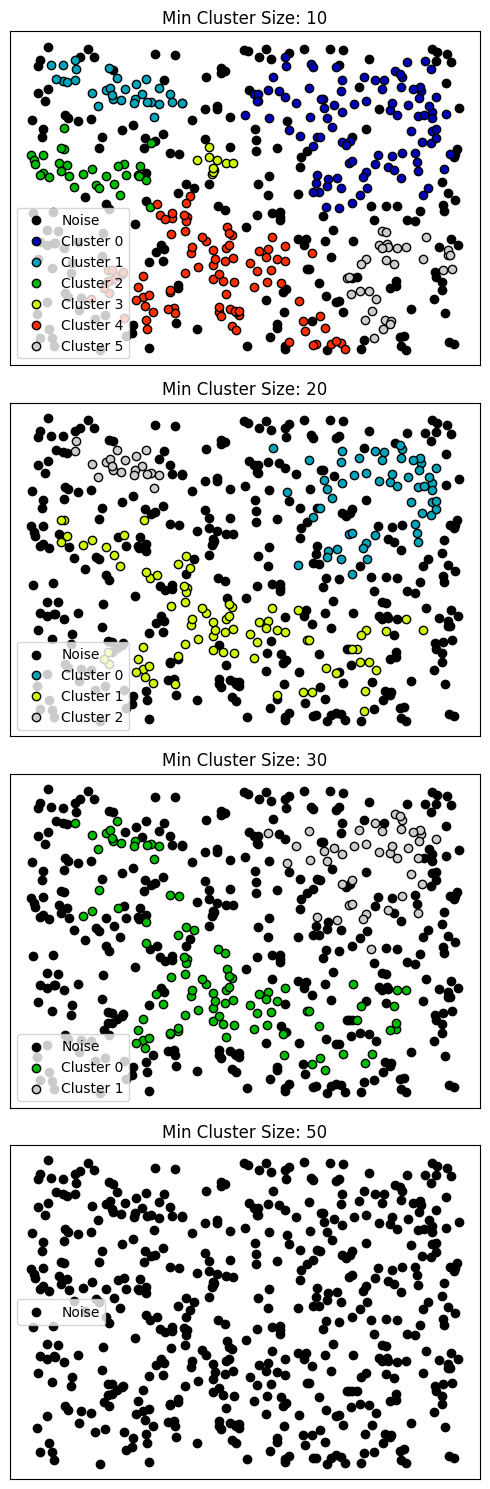

In [5]:
# Values of the parameter to explore
min_cluster_sizes = [10, 20, 30, 50]

# Plotting parameters
fig, axes = plt.subplots(len(min_cluster_sizes), 1,  figsize=(5, 15))
j = 0
for i, min_cluster_size in enumerate(min_cluster_sizes):
    X, y = no_structure

    # Cluster using HDBSCAN with different min_cluster_size
    clusterer = HDBSCAN(min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(X)

    # Plot clusters and noise
    unique_labels = np.unique(labels)
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
    
    ax = axes[i]
    for l, col in zip(unique_labels, colors):
        if l == -1:
            col = 'k'  # Black color for noise points
            label="Noise"
        else:
            label= f'Cluster {l}'
        cluster_member_mask = (labels == l)
        xy = X[cluster_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', label=label)

    ax.set_title(f"Min Cluster Size: {min_cluster_size}")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

plt.tight_layout()
plt.show()

### Min samples

This parameter affects the density of clusters. It specifies the number of neighbors a point must have within a specified radius to be considered a core point.

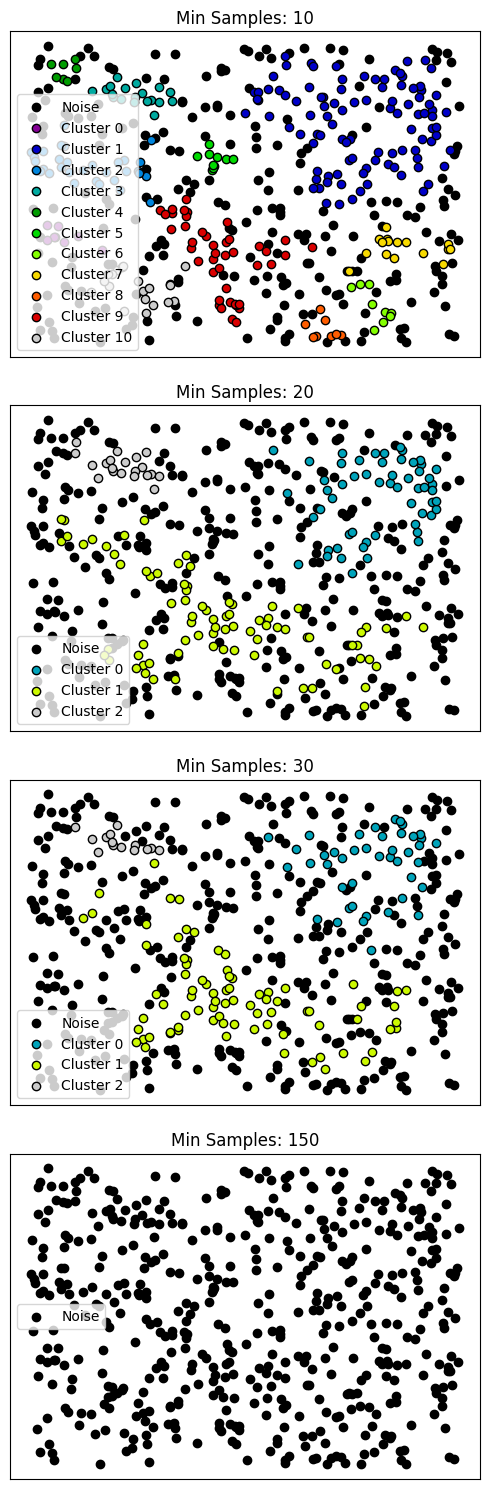

In [6]:
# Values of the parameter to explore
min_samples_sizes = [10, 20, 30, 150]

# Plotting parameters
fig, axes = plt.subplots(len(min_samples_sizes), 1,  figsize=(5, 15))
j = 0
for i, min_sample_size in enumerate(min_samples_sizes):
    X, y = no_structure

    # Cluster using HDBSCAN with different min_cluster_size
    clusterer = HDBSCAN(min_samples=min_sample_size)
    labels = clusterer.fit_predict(X)

    # Plot clusters and noise
    unique_labels = np.unique(labels)
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
    
    ax = axes[i]
    for l, col in zip(unique_labels, colors):
        if l == -1:
            col = 'k'  # Black color for noise points
            label="Noise"
        else:
            label= f'Cluster {l}'
        cluster_member_mask = (labels == l)
        xy = X[cluster_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', label=label)

    ax.set_title(f"Min Samples: {min_sample_size}")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

plt.tight_layout()
plt.show()

### Alpha

A distance scaling parameter as used in robust single linkage. 

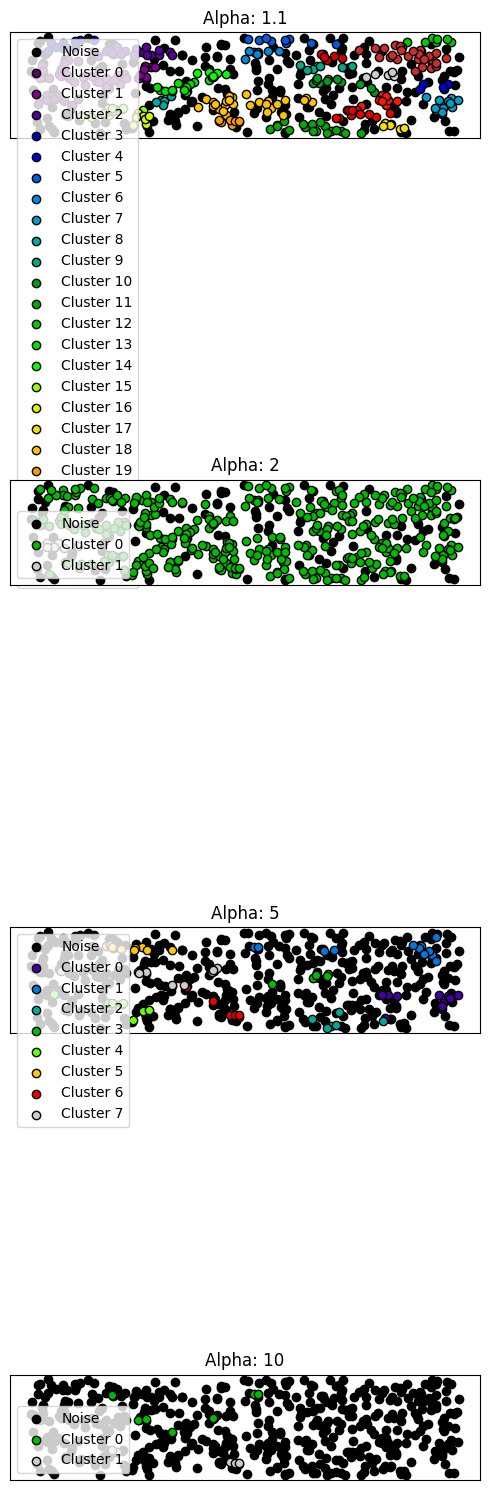

In [7]:
# Values of the parameter to explore
alphas = [1.1, 2, 5, 10]

# Plotting parameters
fig, axes = plt.subplots(len(alphas), 1,  figsize=(5, 15))
j = 0
for i, alpha in enumerate(alphas):
    X, y = no_structure

    # Cluster using HDBSCAN with different min_cluster_size
    clusterer = HDBSCAN(alpha=alpha)
    labels = clusterer.fit_predict(X)

    # Plot clusters and noise
    unique_labels = np.unique(labels)
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))
    
    ax = axes[i]
    for l, col in zip(unique_labels, colors):
        if l == -1:
            col = 'k'  # Black color for noise points
            label="Noise"
        else:
            label= f'Cluster {l}'
        cluster_member_mask = (labels == l)
        xy = X[cluster_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], color=col, edgecolor='k', label=label)

    ax.set_title(f"Alpha: {alpha}")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

plt.tight_layout()
plt.show()